In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=None
pd.options.display.max_columns=None
import seaborn as sns
from scipy.stats import probplot
from scipy.stats import shapiro

### Loading the Data and checking some basic information

In [2]:
city=pd.read_csv("train.csv")
city.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
city.shape

(1460, 81)

In [4]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
city.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
city.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
city['YearBuilt']=pd.DataFrame.astype(city['YearBuilt'],"object")
city['YearRemodAdd']=pd.DataFrame.astype(city['YearRemodAdd'],"object")
city['YrSold']=pd.DataFrame.astype(city['YrSold'],"object")

### Plotting Heatmap of the data to check the correlation between the columns.

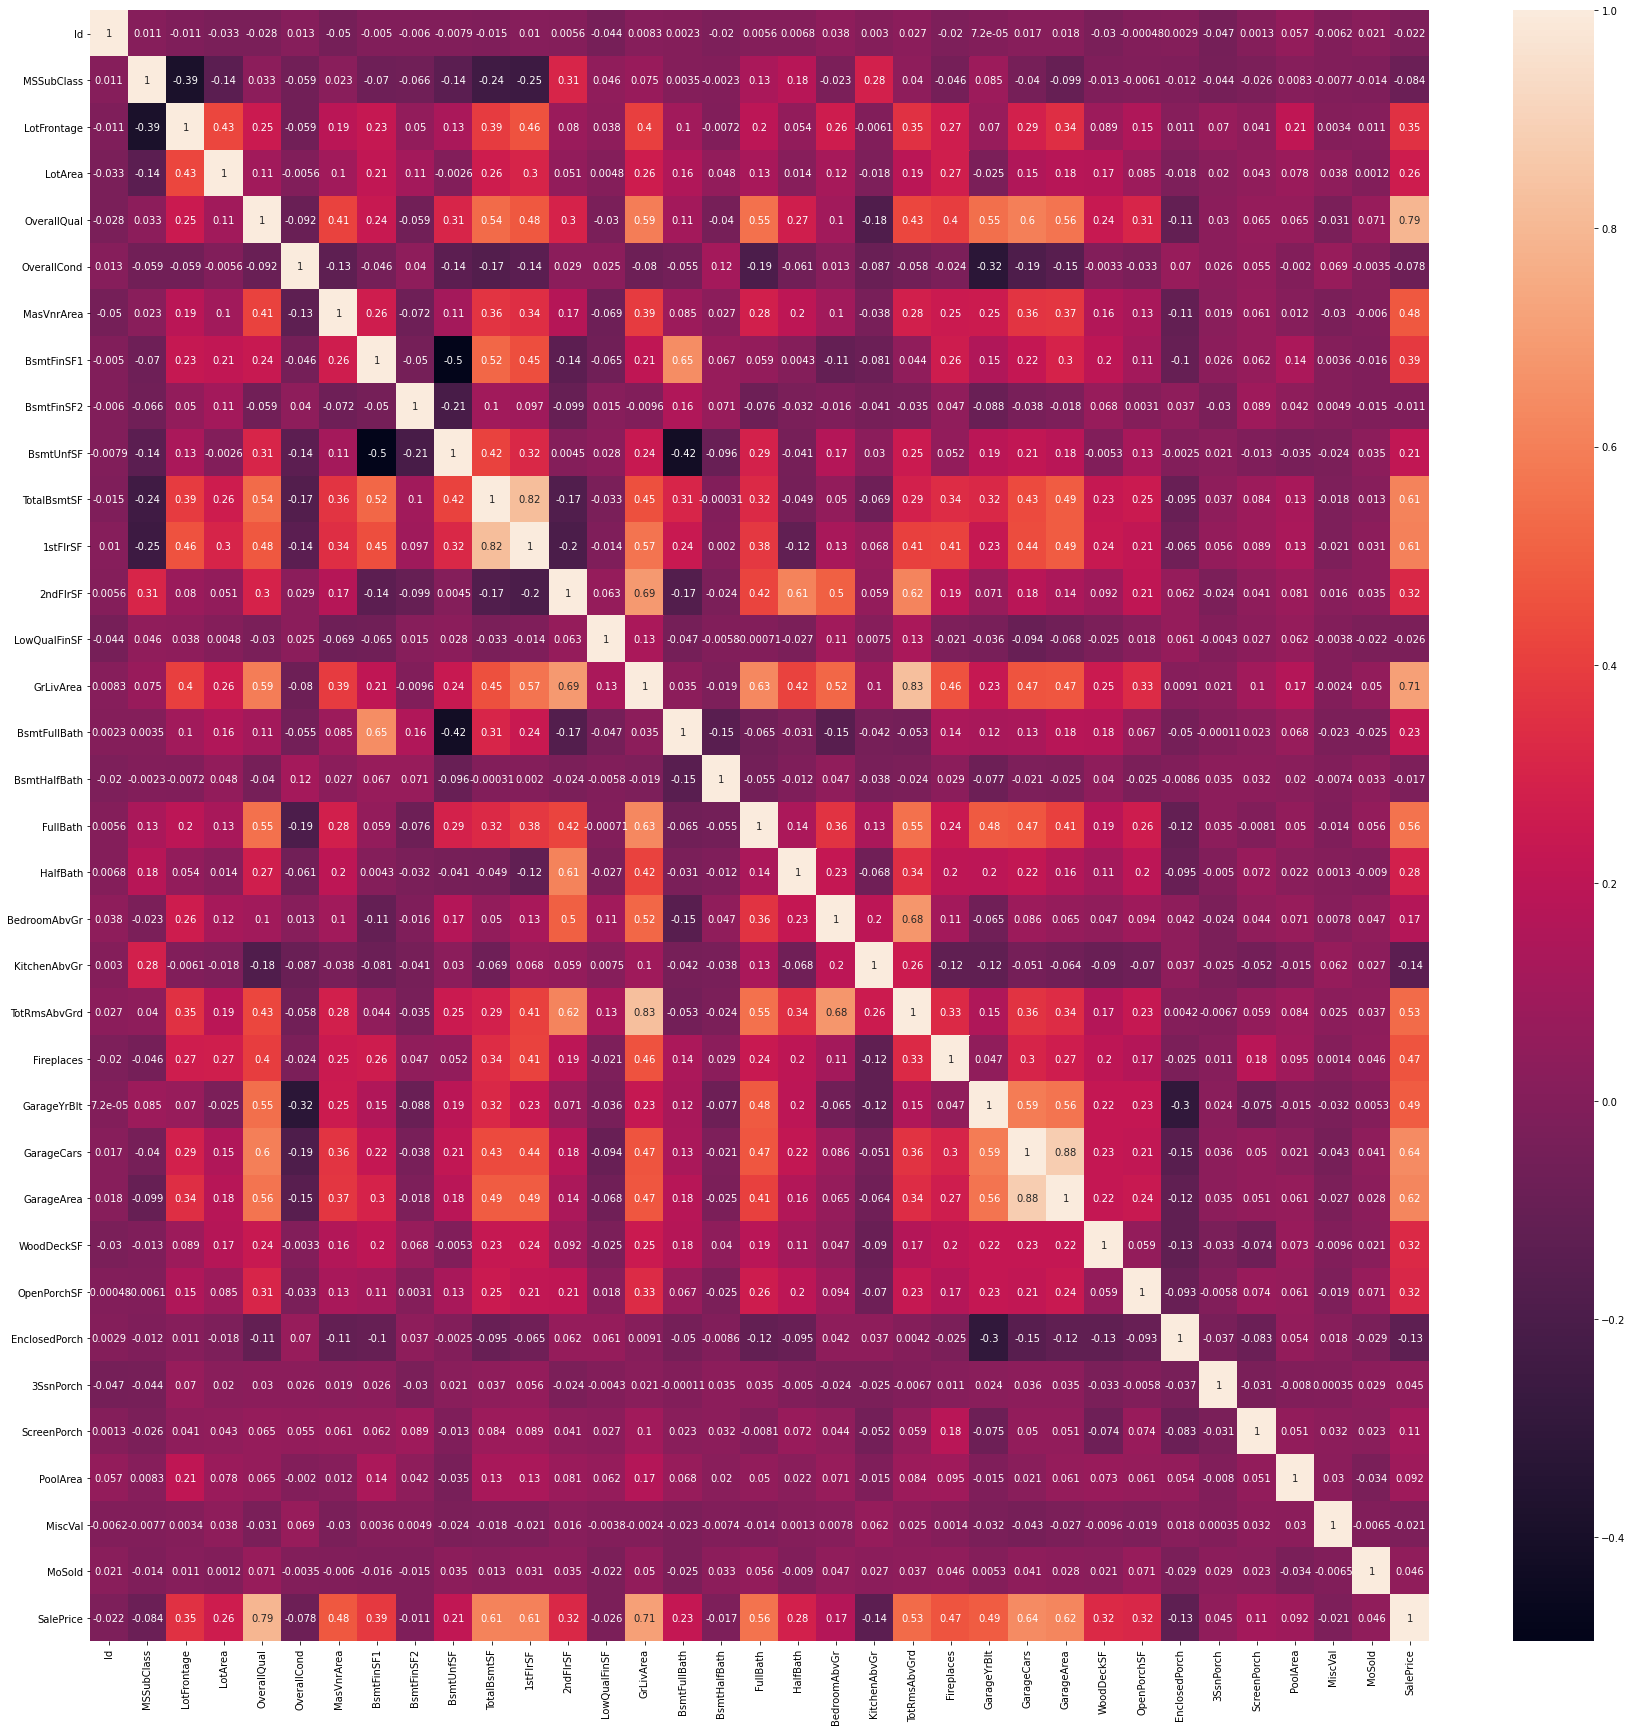

In [8]:
plt.figure(figsize=(30,30))
sns.heatmap(data = city.corr(), annot = True)
plt.show()

<AxesSubplot:>

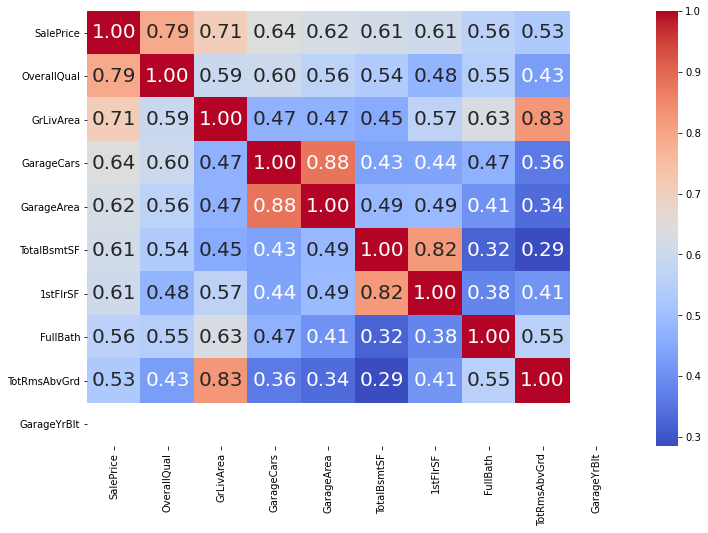

In [9]:
# correlation matrix for the top 10 highest correlations
corr=city.corr()
cols=corr.nlargest(10,"SalePrice")["SalePrice"].index
cm=np.corrcoef(city[cols].values.T)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,cmap="coolwarm",xticklabels=cols.values,yticklabels=cols.values,annot_kws={"size":20},fmt='.2f')


### null values 

In [10]:
def only_null(dataframe):
    a=dataframe.isnull().sum().sort_values(ascending=False)
    b=0
    for i in a:
        if i>0:
            b=b+1    #increse woth each null     
        else:
            continue
    return dataframe.isnull().sum().sort_values(ascending=False)[:b] #retuen only null vols via indexing

In [11]:
list(only_null(city).index)

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [12]:
city.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage","GarageYrBlt","GarageFinish"],axis=1,inplace=True)

In [13]:
for i in list(only_null(city).index):
    city[i].fillna(city[i].mode()[0],inplace=True)
city.head(2)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [14]:
city.isnull().sum() # all null removes and filled via mode

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

### Let's do the Univariate Analysis of the columns

In [15]:

def uni_cat(x):
    print("------->>  The plot is of ",i," column.",end="\n\n")
    sns.countplot(x=x, data=city)
    plt.show()
    print(city[x].value_counts(normalize=True)*100)
    print("the category with highest number of frequency is ",city[x].mode()[0])
    print("\n\n")

In [16]:
def uni_num(x):
    print("------->>  The plot is of ",i," column.",end="\n\n\n")
    sns.displot(city[x])
    plt.show()
    sns.boxplot(x=x,data=city)
    plt.show()
    print("skewness of the ",x,"column is ",city[x].skew())
    probplot(city[x],plot=plt)
    test,pval=shapiro(city[x])
    if pval<0.05:
        print("pval is less than 0.05 therefore it is not normal distributed")
    else:
        print("pval is more than 0.05 therefore it is  normal distributed")
    print("\n\n")
    plt.show()
    

------->>  The plot is of  MSZoning  column.



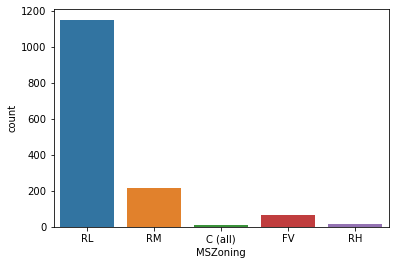

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
the category with highest number of frequency is  RL



------->>  The plot is of  Street  column.



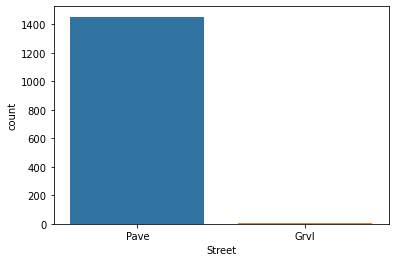

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
the category with highest number of frequency is  Pave



------->>  The plot is of  LotShape  column.



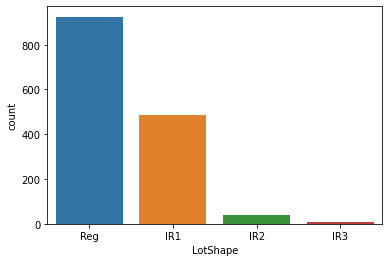

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
the category with highest number of frequency is  Reg



------->>  The plot is of  LandContour  column.



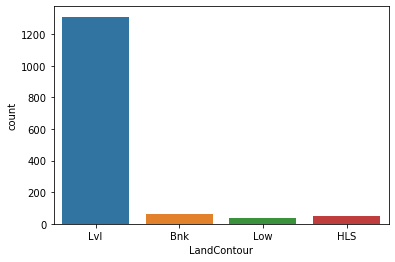

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
the category with highest number of frequency is  Lvl



------->>  The plot is of  Utilities  column.



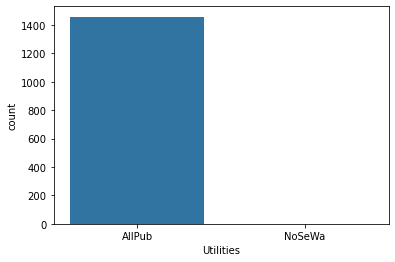

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
the category with highest number of frequency is  AllPub



------->>  The plot is of  LotConfig  column.



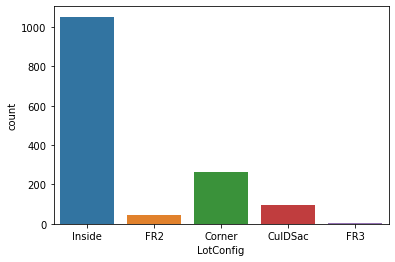

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
the category with highest number of frequency is  Inside



------->>  The plot is of  LandSlope  column.



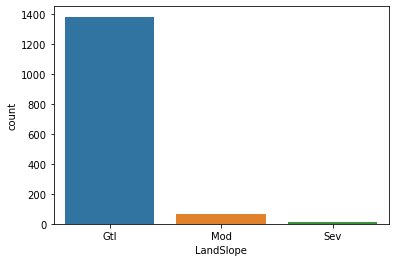

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
the category with highest number of frequency is  Gtl



------->>  The plot is of  Neighborhood  column.



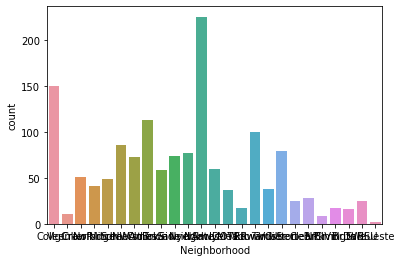

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64
the category with highest number of frequency is  NAmes



------->>  The plot is of  Condition1  column.



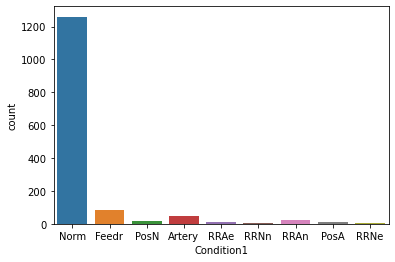

Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64
the category with highest number of frequency is  Norm



------->>  The plot is of  Condition2  column.



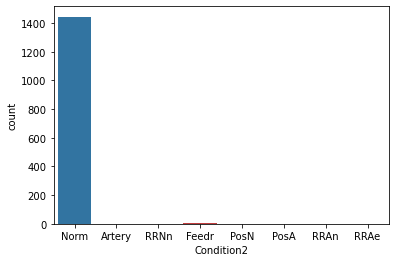

Norm      98.972603
Feedr      0.410959
RRNn       0.136986
Artery     0.136986
PosN       0.136986
RRAe       0.068493
RRAn       0.068493
PosA       0.068493
Name: Condition2, dtype: float64
the category with highest number of frequency is  Norm



------->>  The plot is of  BldgType  column.



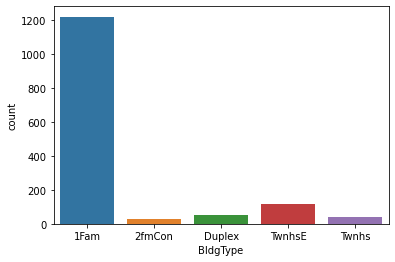

1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64
the category with highest number of frequency is  1Fam



------->>  The plot is of  HouseStyle  column.



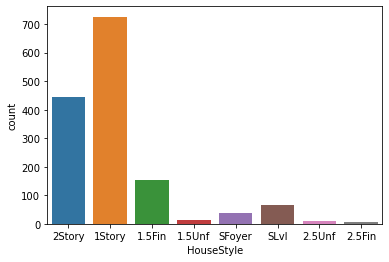

1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: HouseStyle, dtype: float64
the category with highest number of frequency is  1Story



------->>  The plot is of  YearBuilt  column.



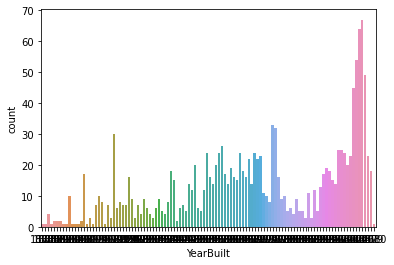

2006    4.589041
2005    4.383562
2004    3.698630
2007    3.356164
2003    3.082192
1976    2.260274
1977    2.191781
1920    2.054795
1959    1.780822
1999    1.712329
1998    1.712329
1958    1.643836
1965    1.643836
1970    1.643836
1954    1.643836
2000    1.643836
2002    1.575342
2008    1.575342
1972    1.575342
1968    1.506849
1971    1.506849
1950    1.369863
2001    1.369863
1957    1.369863
1962    1.301370
1994    1.301370
1966    1.232877
2009    1.232877
1995    1.232877
1940    1.232877
1910    1.164384
1960    1.164384
1993    1.164384
1978    1.095890
1955    1.095890
1925    1.095890
1963    1.095890
1967    1.095890
1996    1.027397
1941    1.027397
1964    1.027397
1969    0.958904
1956    0.958904
1961    0.958904
1997    0.958904
1948    0.958904
1992    0.890411
1990    0.821918
1953    0.821918
1949    0.821918
1988    0.753425
1973    0.753425
1915    0.684932
1900    0.684932
1980    0.684932
1974    0.684932
1979    0.616438
1926    0.616438
1930    0.6164

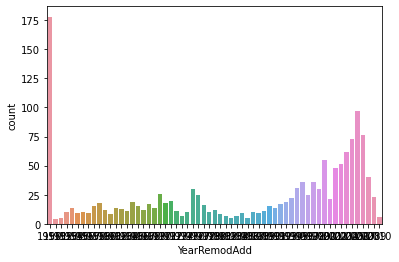

1950    12.191781
2006     6.643836
2007     5.205479
2005     5.000000
2004     4.246575
2000     3.767123
2003     3.493151
2002     3.287671
2008     2.739726
1996     2.465753
1998     2.465753
1995     2.123288
1976     2.054795
1999     2.054795
1970     1.780822
1997     1.712329
1977     1.712329
2009     1.575342
1994     1.506849
2001     1.438356
1972     1.369863
1965     1.301370
1993     1.301370
1971     1.232877
1959     1.232877
1968     1.164384
1992     1.164384
1978     1.095890
1966     1.027397
1958     1.027397
1990     1.027397
1962     0.958904
1954     0.958904
1969     0.958904
1991     0.958904
1963     0.890411
1960     0.821918
1967     0.821918
1980     0.821918
1973     0.753425
1964     0.753425
1989     0.753425
1987     0.684932
1975     0.684932
1979     0.684932
1956     0.684932
1953     0.684932
1957     0.616438
1988     0.616438
1955     0.616438
1985     0.616438
1961     0.547945
1981     0.547945
1974     0.479452
1982     0.479452
1984     0

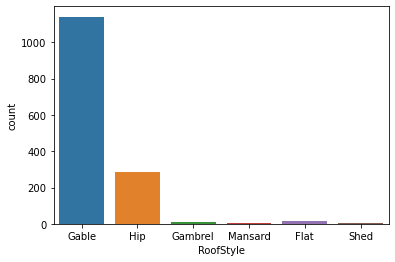

Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64
the category with highest number of frequency is  Gable



------->>  The plot is of  RoofMatl  column.



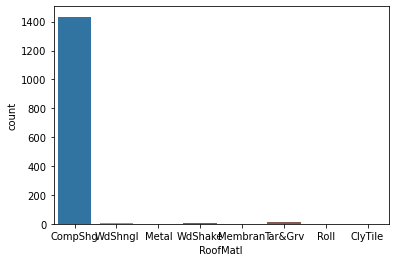

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Roll        0.068493
Metal       0.068493
ClyTile     0.068493
Membran     0.068493
Name: RoofMatl, dtype: float64
the category with highest number of frequency is  CompShg



------->>  The plot is of  Exterior1st  column.



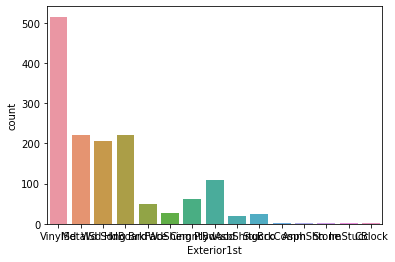

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Stone       0.136986
BrkComm     0.136986
AsphShn     0.068493
CBlock      0.068493
ImStucc     0.068493
Name: Exterior1st, dtype: float64
the category with highest number of frequency is  VinylSd



------->>  The plot is of  Exterior2nd  column.



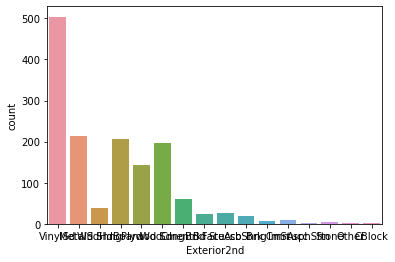

VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
CBlock      0.068493
Other       0.068493
Name: Exterior2nd, dtype: float64
the category with highest number of frequency is  VinylSd



------->>  The plot is of  MasVnrType  column.



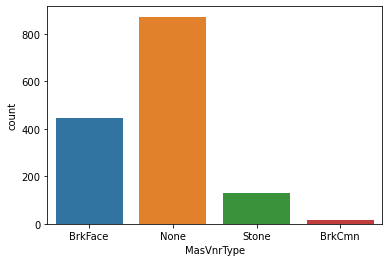

None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64
the category with highest number of frequency is  None



------->>  The plot is of  ExterQual  column.



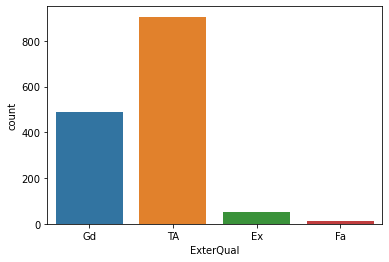

TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64
the category with highest number of frequency is  TA



------->>  The plot is of  ExterCond  column.



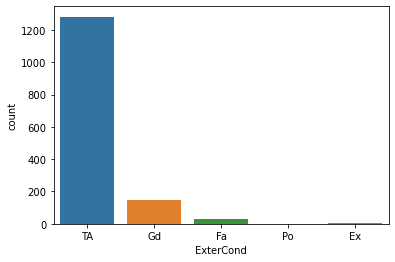

TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64
the category with highest number of frequency is  TA



------->>  The plot is of  Foundation  column.



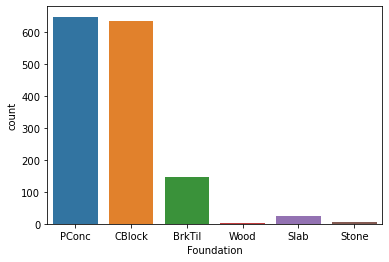

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64
the category with highest number of frequency is  PConc



------->>  The plot is of  BsmtQual  column.



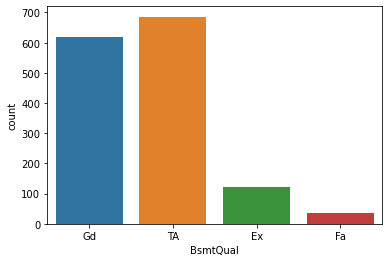

TA    46.986301
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64
the category with highest number of frequency is  TA



------->>  The plot is of  BsmtCond  column.



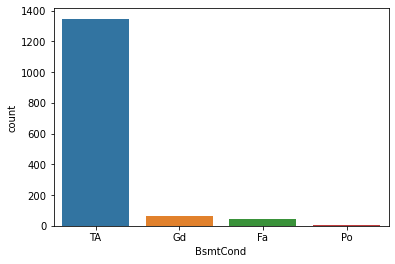

TA    92.328767
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: BsmtCond, dtype: float64
the category with highest number of frequency is  TA



------->>  The plot is of  BsmtExposure  column.



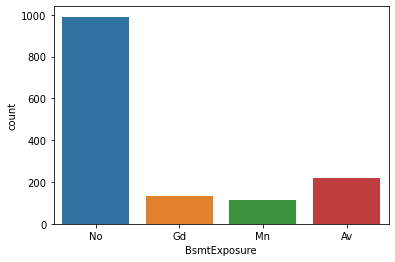

No    67.876712
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64
the category with highest number of frequency is  No



------->>  The plot is of  BsmtFinType1  column.



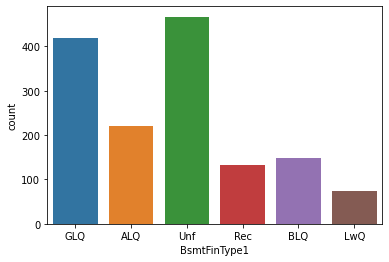

Unf    31.986301
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64
the category with highest number of frequency is  Unf



------->>  The plot is of  BsmtFinType2  column.



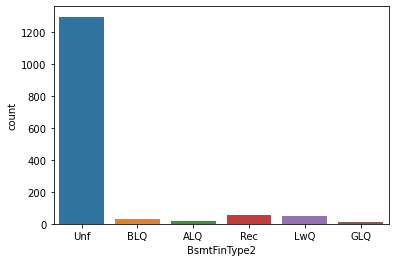

Unf    88.630137
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64
the category with highest number of frequency is  Unf



------->>  The plot is of  Heating  column.



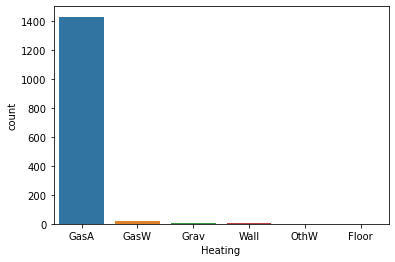

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64
the category with highest number of frequency is  GasA



------->>  The plot is of  HeatingQC  column.



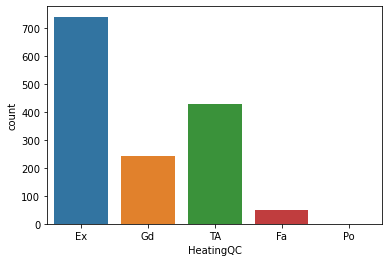

Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64
the category with highest number of frequency is  Ex



------->>  The plot is of  CentralAir  column.



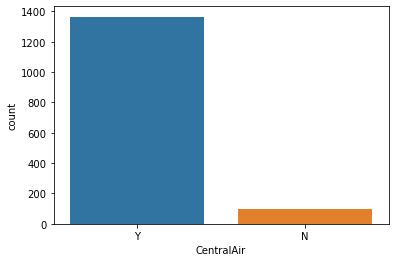

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64
the category with highest number of frequency is  Y



------->>  The plot is of  Electrical  column.



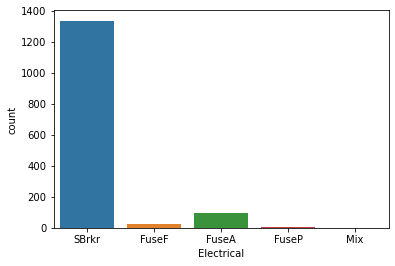

SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64
the category with highest number of frequency is  SBrkr



------->>  The plot is of  KitchenQual  column.



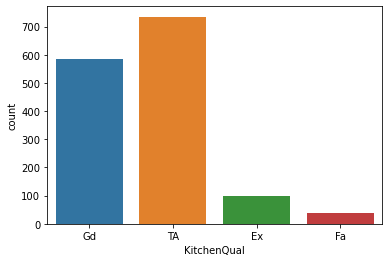

TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64
the category with highest number of frequency is  TA



------->>  The plot is of  Functional  column.



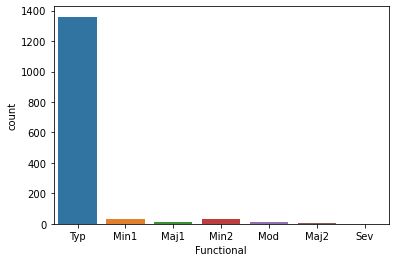

Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64
the category with highest number of frequency is  Typ



------->>  The plot is of  GarageType  column.



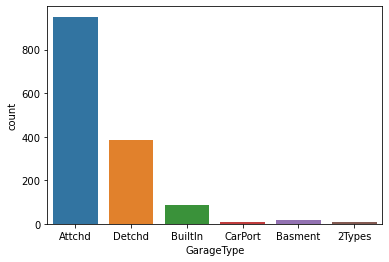

Attchd     65.136986
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64
the category with highest number of frequency is  Attchd



------->>  The plot is of  GarageQual  column.



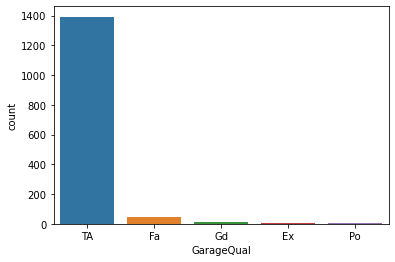

TA    95.342466
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64
the category with highest number of frequency is  TA



------->>  The plot is of  GarageCond  column.



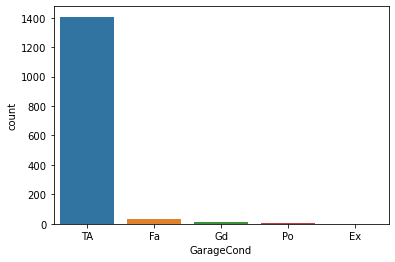

TA    96.369863
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64
the category with highest number of frequency is  TA



------->>  The plot is of  PavedDrive  column.



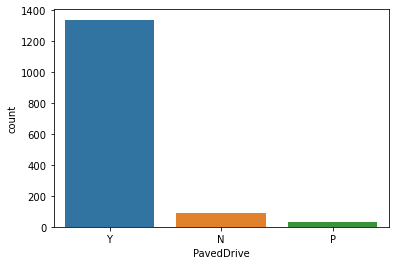

Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64
the category with highest number of frequency is  Y



------->>  The plot is of  YrSold  column.



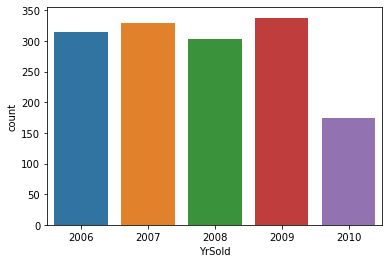

2009    23.150685
2007    22.534247
2006    21.506849
2008    20.821918
2010    11.986301
Name: YrSold, dtype: float64
the category with highest number of frequency is  2009



------->>  The plot is of  SaleType  column.



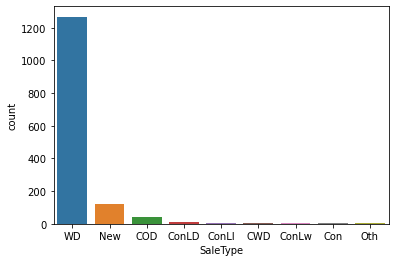

WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLI     0.342466
ConLw     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64
the category with highest number of frequency is  WD



------->>  The plot is of  SaleCondition  column.



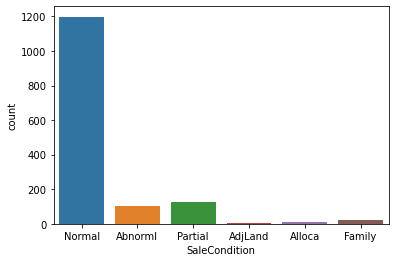

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64
the category with highest number of frequency is  Normal





In [17]:
for i in city.select_dtypes(include="object"):
    uni_cat(i)

------->>  The plot is of  Id  column.




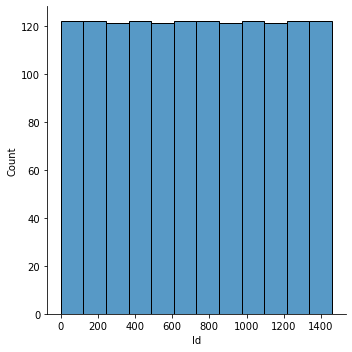

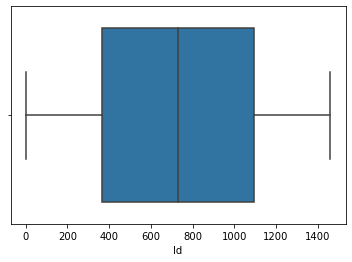

skewness of the  Id column is  0.0
pval is less than 0.05 therefore it is not normal distributed





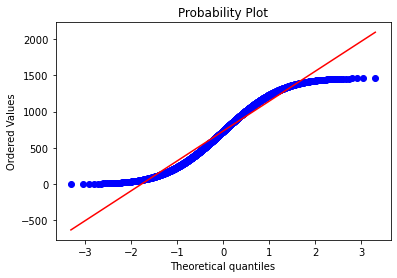

------->>  The plot is of  MSSubClass  column.




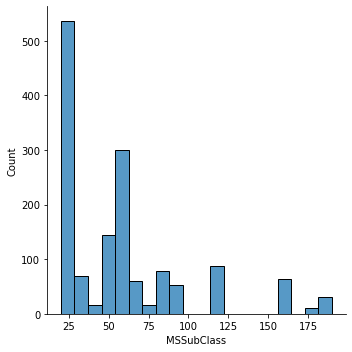

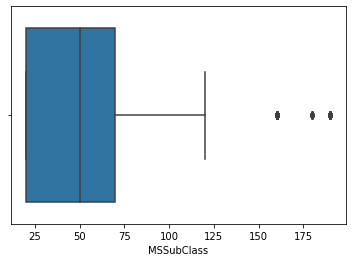

skewness of the  MSSubClass column is  1.4076567471495591
pval is less than 0.05 therefore it is not normal distributed





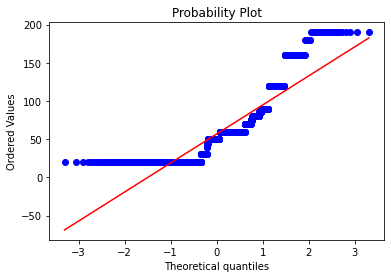

------->>  The plot is of  LotArea  column.




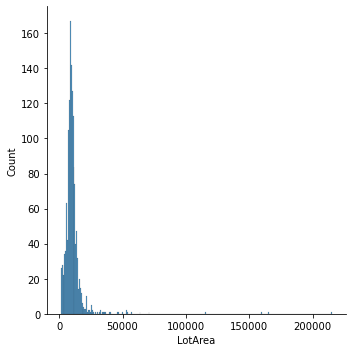

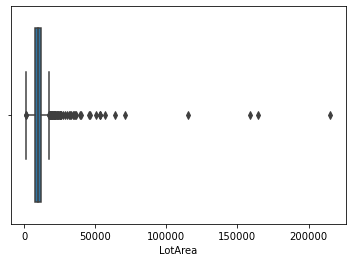

skewness of the  LotArea column is  12.207687851233496
pval is less than 0.05 therefore it is not normal distributed





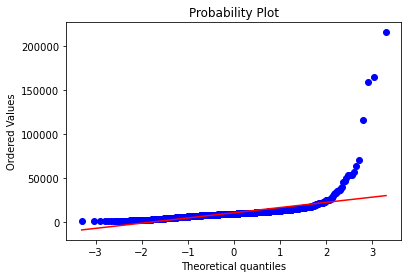

------->>  The plot is of  OverallQual  column.




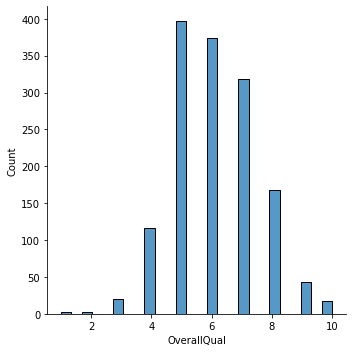

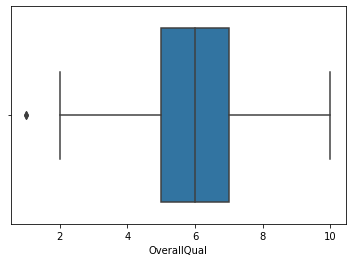

skewness of the  OverallQual column is  0.2169439277628693
pval is less than 0.05 therefore it is not normal distributed





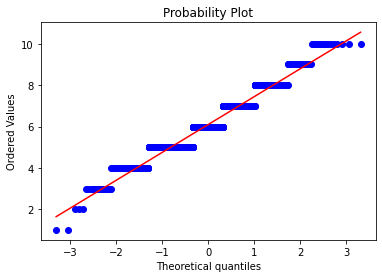

------->>  The plot is of  OverallCond  column.




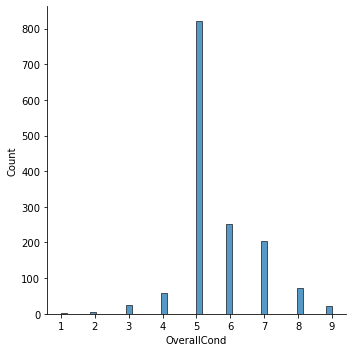

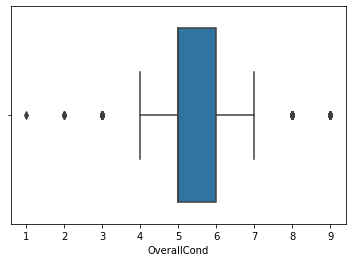

skewness of the  OverallCond column is  0.6930674724842182
pval is less than 0.05 therefore it is not normal distributed





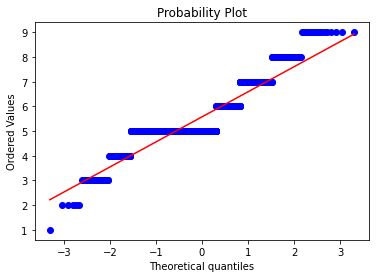

------->>  The plot is of  MasVnrArea  column.




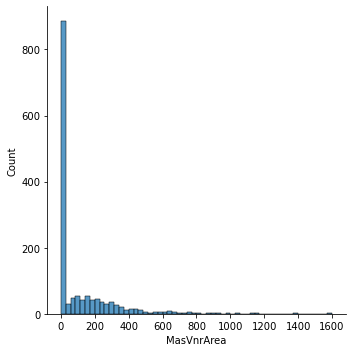

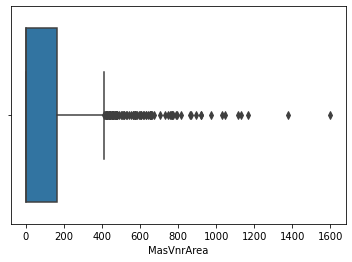

skewness of the  MasVnrArea column is  2.6776164510820997
pval is less than 0.05 therefore it is not normal distributed





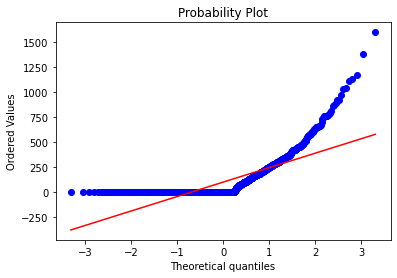

------->>  The plot is of  BsmtFinSF1  column.




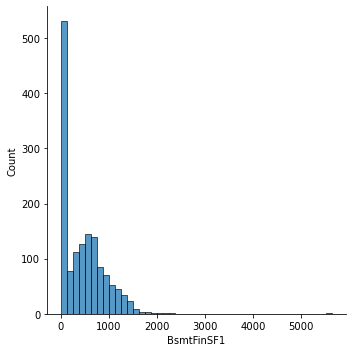

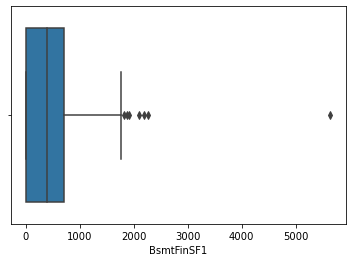

skewness of the  BsmtFinSF1 column is  1.685503071910789
pval is less than 0.05 therefore it is not normal distributed





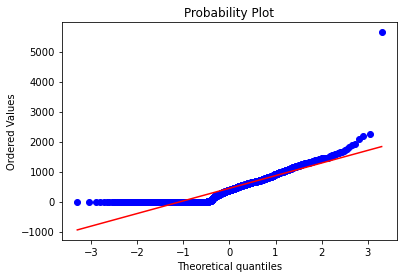

------->>  The plot is of  BsmtFinSF2  column.




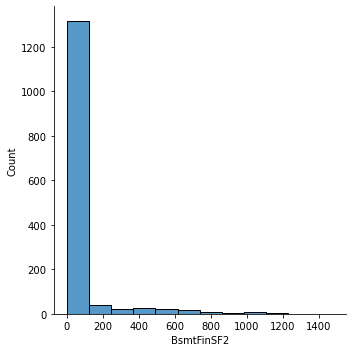

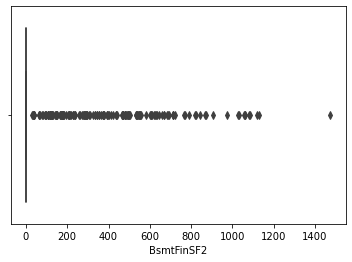

skewness of the  BsmtFinSF2 column is  4.255261108933303
pval is less than 0.05 therefore it is not normal distributed





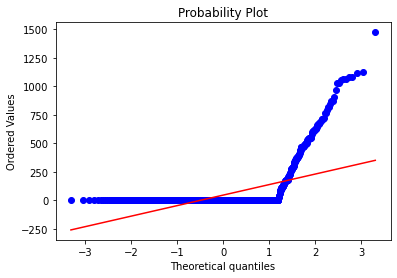

------->>  The plot is of  BsmtUnfSF  column.




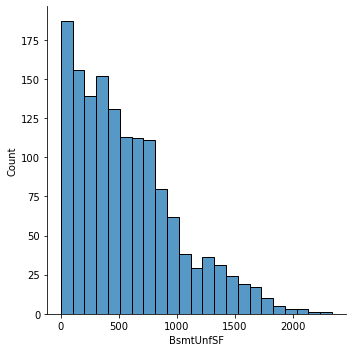

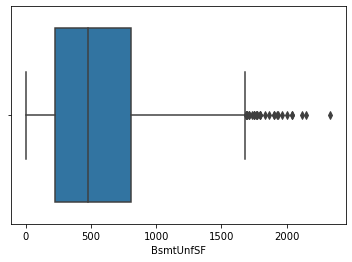

skewness of the  BsmtUnfSF column is  0.9202684528039037
pval is less than 0.05 therefore it is not normal distributed





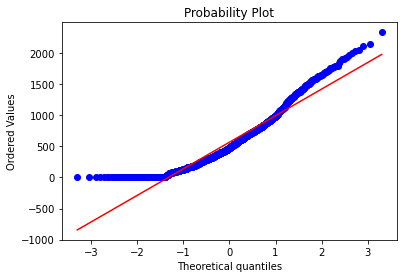

------->>  The plot is of  TotalBsmtSF  column.




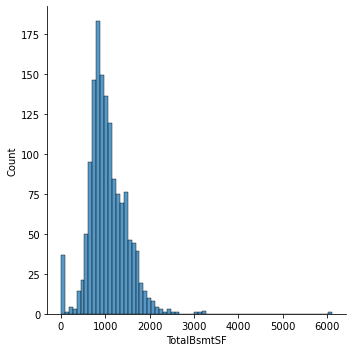

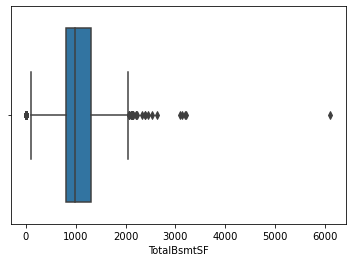

skewness of the  TotalBsmtSF column is  1.5242545490627664
pval is less than 0.05 therefore it is not normal distributed





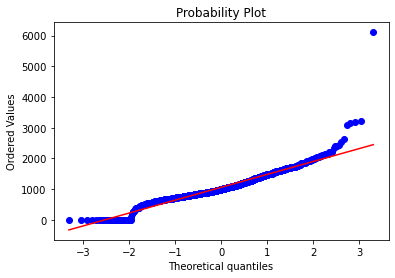

------->>  The plot is of  1stFlrSF  column.




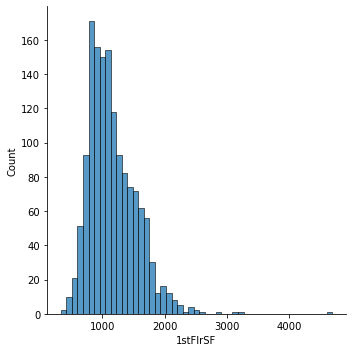

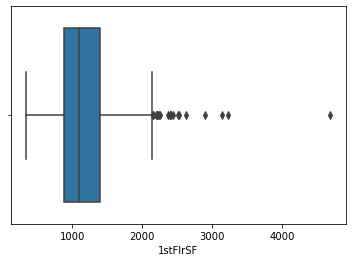

skewness of the  1stFlrSF column is  1.3767566220336365
pval is less than 0.05 therefore it is not normal distributed





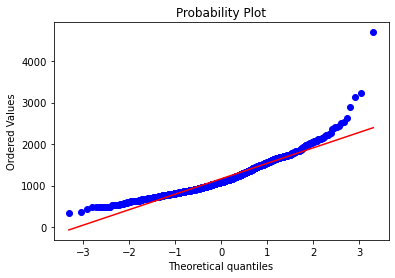

------->>  The plot is of  2ndFlrSF  column.




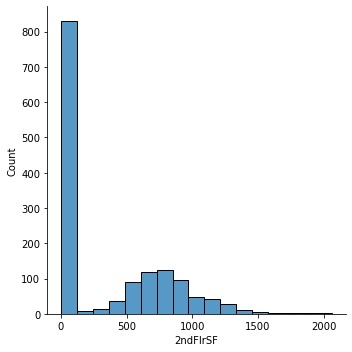

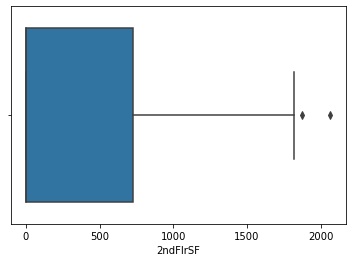

skewness of the  2ndFlrSF column is  0.8130298163023265
pval is less than 0.05 therefore it is not normal distributed





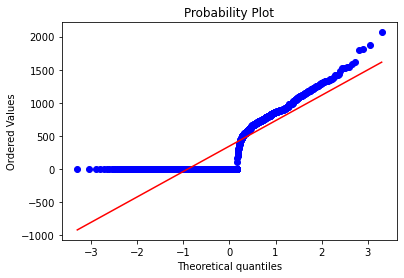

------->>  The plot is of  LowQualFinSF  column.




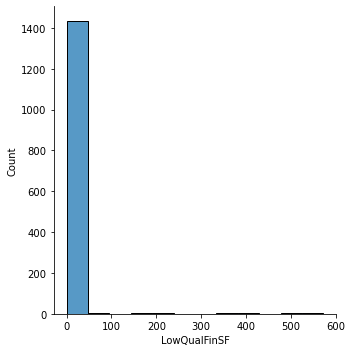

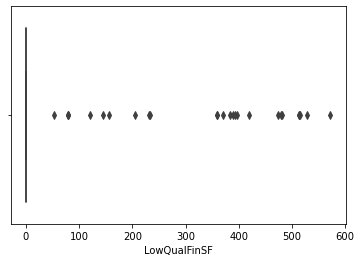

skewness of the  LowQualFinSF column is  9.011341288465387
pval is less than 0.05 therefore it is not normal distributed





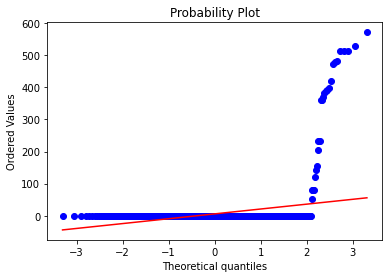

------->>  The plot is of  GrLivArea  column.




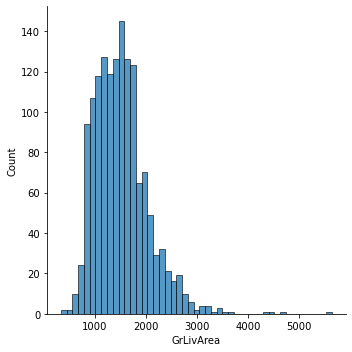

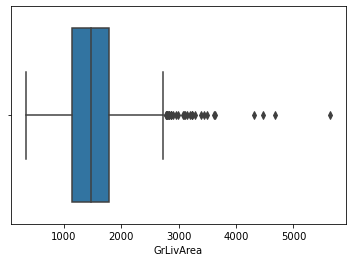

skewness of the  GrLivArea column is  1.3665603560164552
pval is less than 0.05 therefore it is not normal distributed





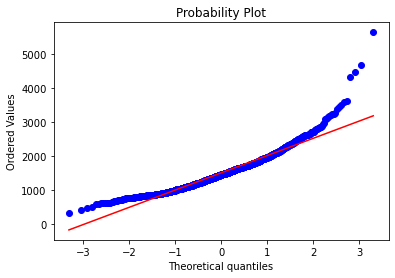

------->>  The plot is of  BsmtFullBath  column.




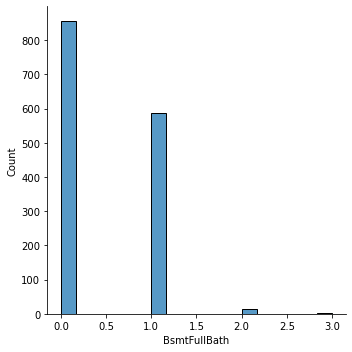

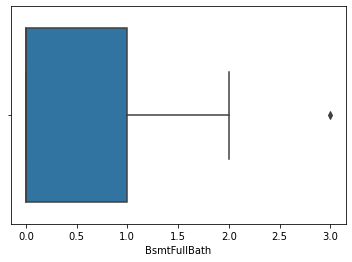

skewness of the  BsmtFullBath column is  0.596066609663168
pval is less than 0.05 therefore it is not normal distributed





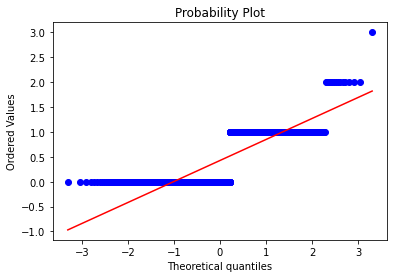

------->>  The plot is of  BsmtHalfBath  column.




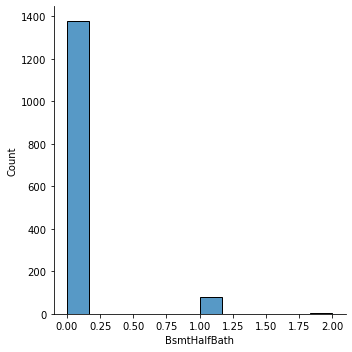

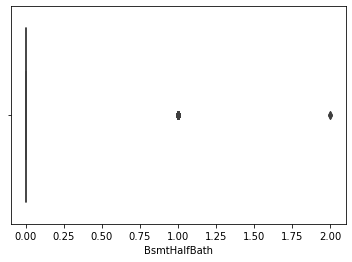

skewness of the  BsmtHalfBath column is  4.103402697955168
pval is less than 0.05 therefore it is not normal distributed





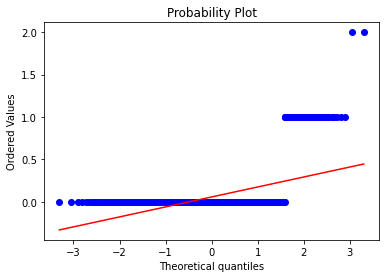

------->>  The plot is of  FullBath  column.




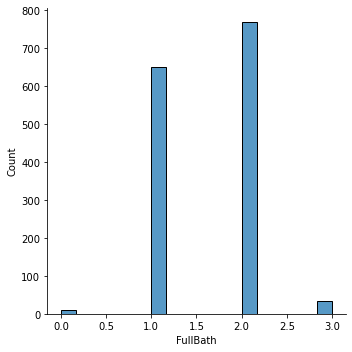

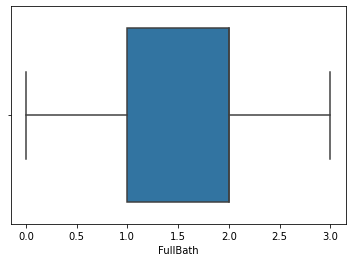

skewness of the  FullBath column is  0.036561558402727165
pval is less than 0.05 therefore it is not normal distributed





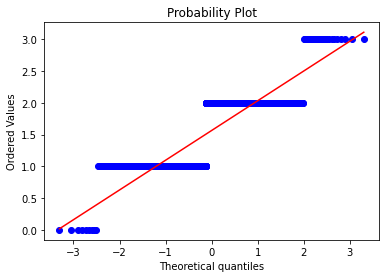

------->>  The plot is of  HalfBath  column.




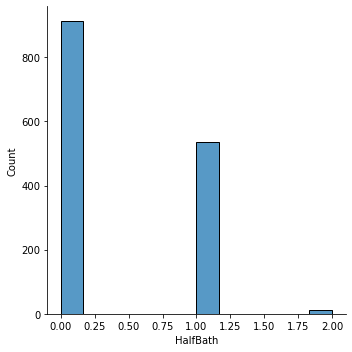

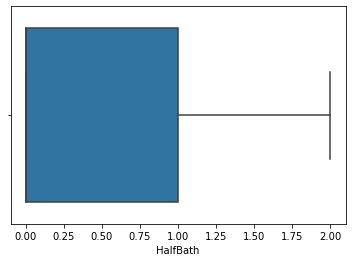

skewness of the  HalfBath column is  0.675897448233722
pval is less than 0.05 therefore it is not normal distributed





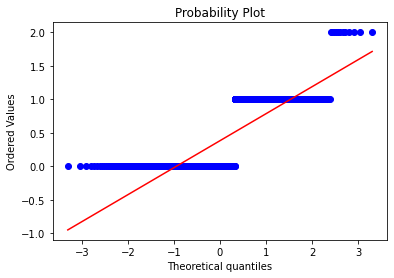

------->>  The plot is of  BedroomAbvGr  column.




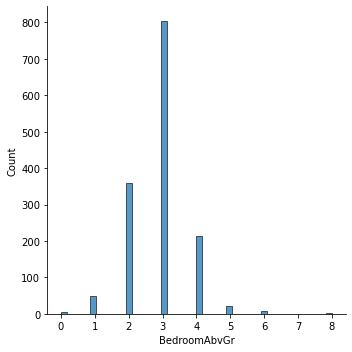

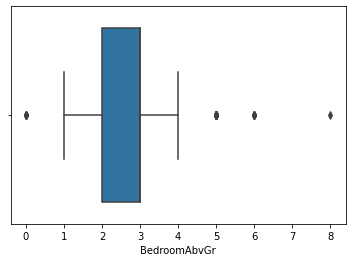

skewness of the  BedroomAbvGr column is  0.21179009627507137
pval is less than 0.05 therefore it is not normal distributed





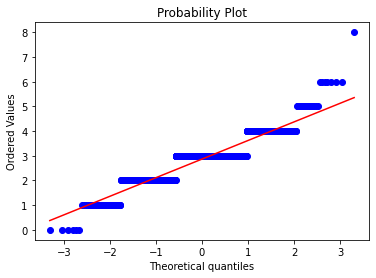

------->>  The plot is of  KitchenAbvGr  column.




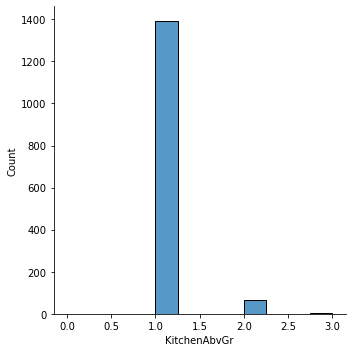

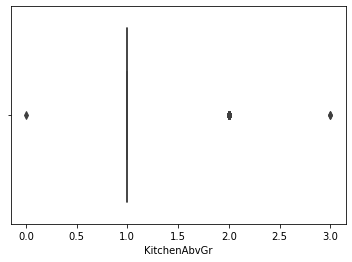

skewness of the  KitchenAbvGr column is  4.488396777072859
pval is less than 0.05 therefore it is not normal distributed





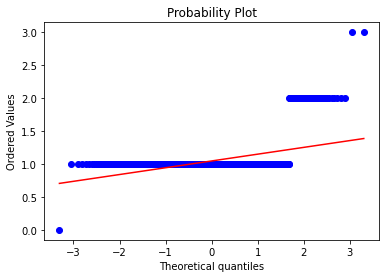

------->>  The plot is of  TotRmsAbvGrd  column.




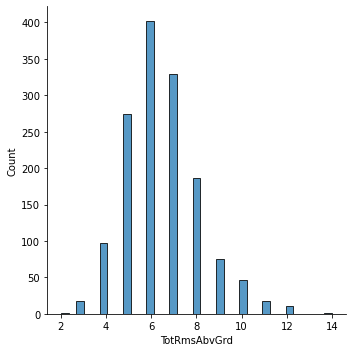

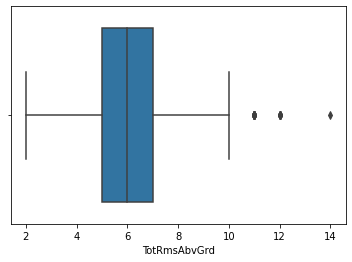

skewness of the  TotRmsAbvGrd column is  0.6763408364355531
pval is less than 0.05 therefore it is not normal distributed





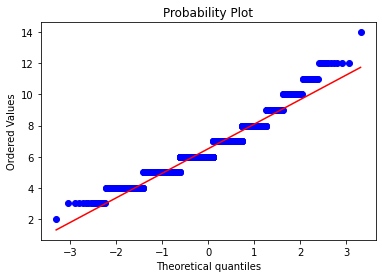

------->>  The plot is of  Fireplaces  column.




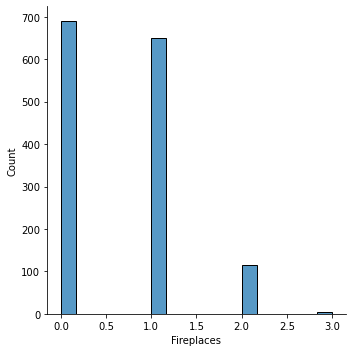

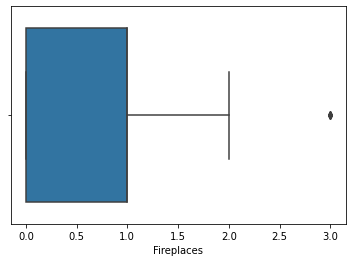

skewness of the  Fireplaces column is  0.6495651830548841
pval is less than 0.05 therefore it is not normal distributed





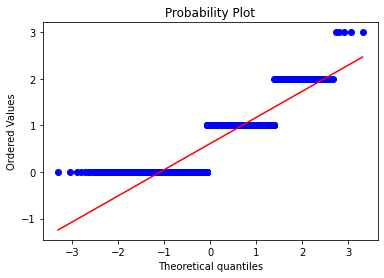

------->>  The plot is of  GarageCars  column.




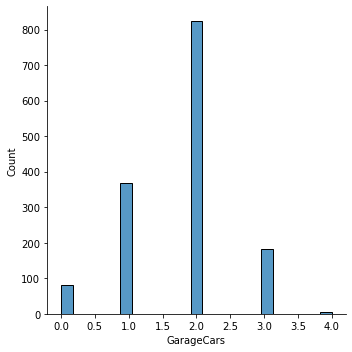

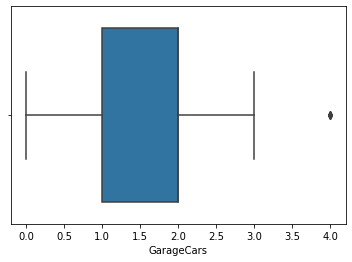

skewness of the  GarageCars column is  -0.3425489297486655
pval is less than 0.05 therefore it is not normal distributed





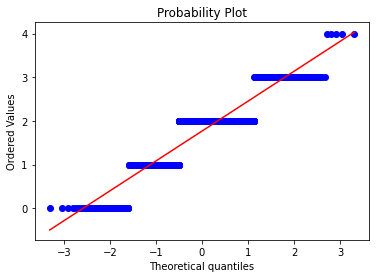

------->>  The plot is of  GarageArea  column.




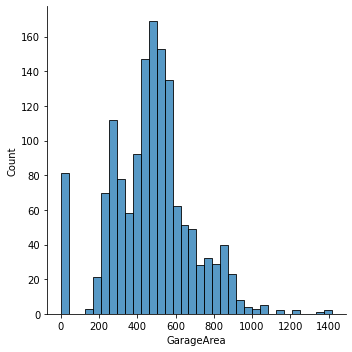

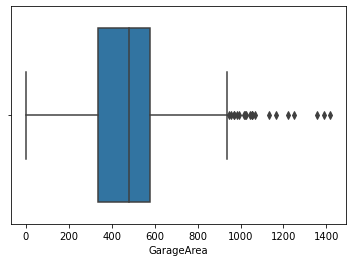

skewness of the  GarageArea column is  0.17998090674623907
pval is less than 0.05 therefore it is not normal distributed





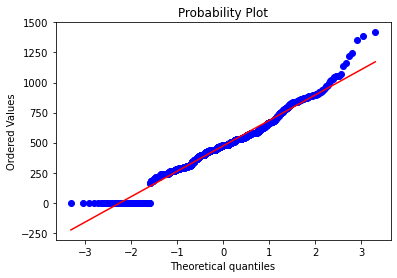

------->>  The plot is of  WoodDeckSF  column.




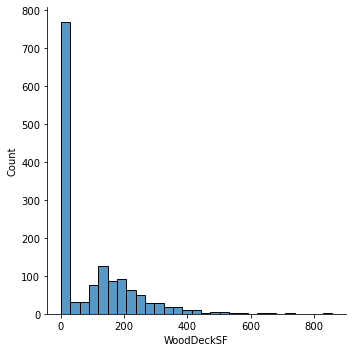

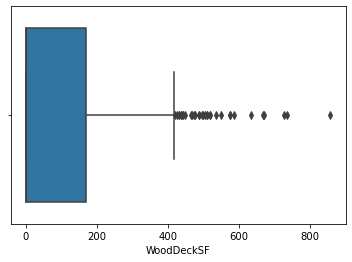

skewness of the  WoodDeckSF column is  1.5413757571931312
pval is less than 0.05 therefore it is not normal distributed





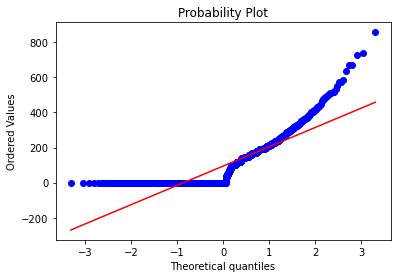

------->>  The plot is of  OpenPorchSF  column.




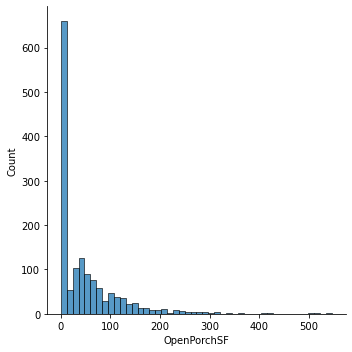

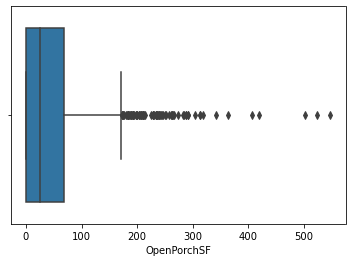

skewness of the  OpenPorchSF column is  2.3643417403694404
pval is less than 0.05 therefore it is not normal distributed





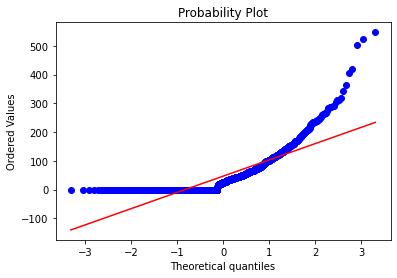

------->>  The plot is of  EnclosedPorch  column.




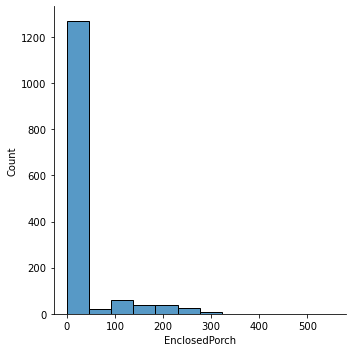

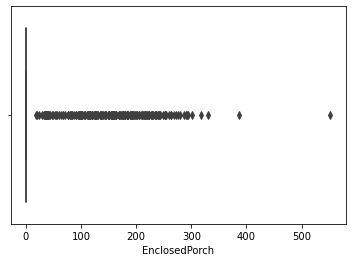

skewness of the  EnclosedPorch column is  3.08987190371177
pval is less than 0.05 therefore it is not normal distributed





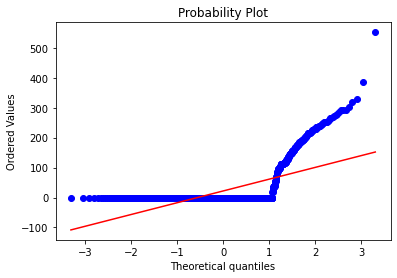

------->>  The plot is of  3SsnPorch  column.




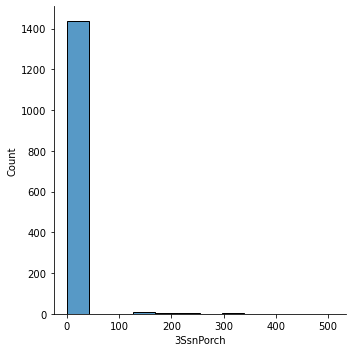

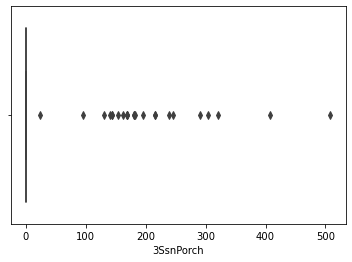

skewness of the  3SsnPorch column is  10.304342032693112
pval is less than 0.05 therefore it is not normal distributed





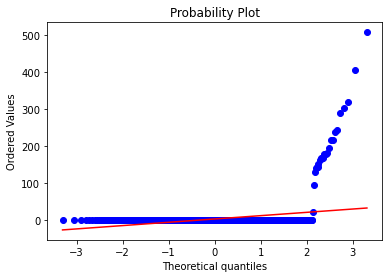

------->>  The plot is of  ScreenPorch  column.




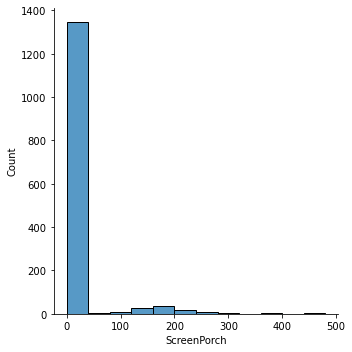

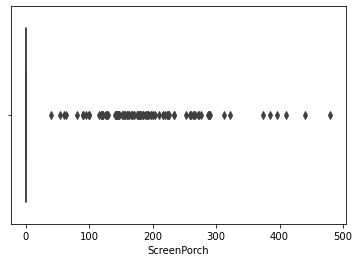

skewness of the  ScreenPorch column is  4.122213743143115
pval is less than 0.05 therefore it is not normal distributed





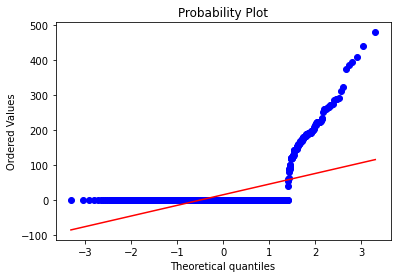

------->>  The plot is of  PoolArea  column.




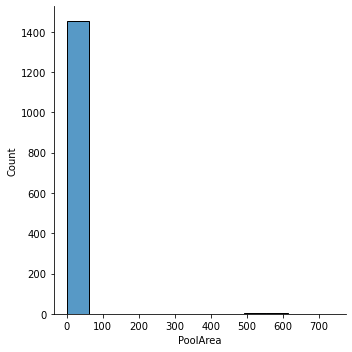

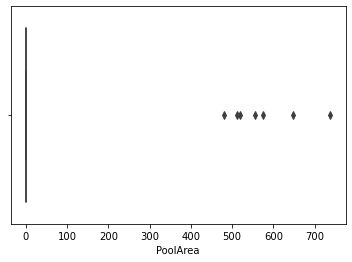

skewness of the  PoolArea column is  14.828373640750588
pval is less than 0.05 therefore it is not normal distributed





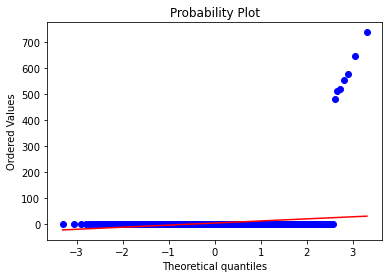

------->>  The plot is of  MiscVal  column.




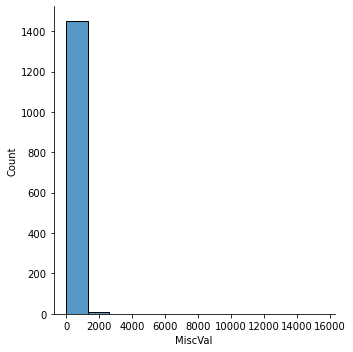

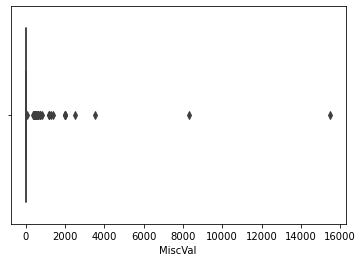

skewness of the  MiscVal column is  24.476794188821916
pval is less than 0.05 therefore it is not normal distributed





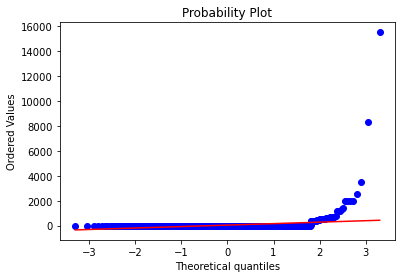

------->>  The plot is of  MoSold  column.




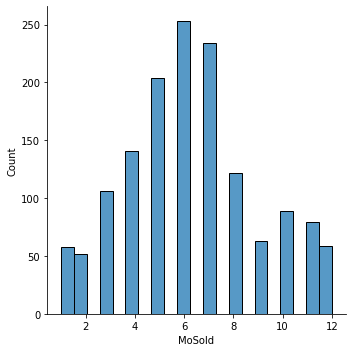

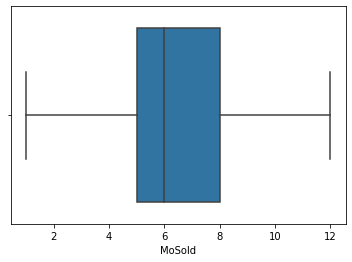

skewness of the  MoSold column is  0.21205298505146022
pval is less than 0.05 therefore it is not normal distributed





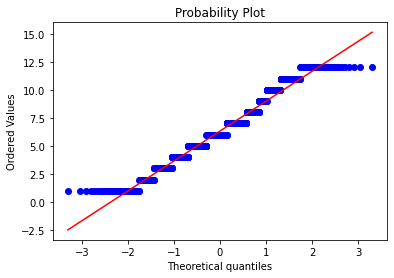

------->>  The plot is of  SalePrice  column.




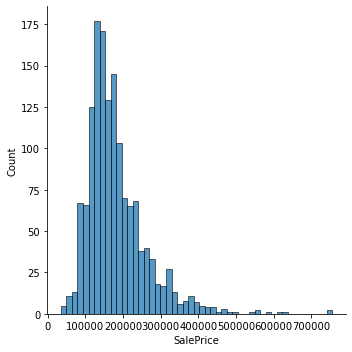

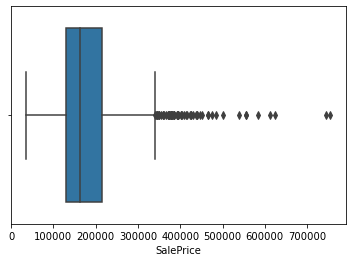

skewness of the  SalePrice column is  1.8828757597682129
pval is less than 0.05 therefore it is not normal distributed





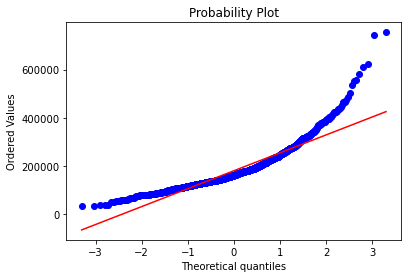

In [18]:
for i in city.select_dtypes(exclude="object"):
    uni_num(i)

### bi variate

In [19]:
def bi_variate(x):
    print("------>> The bivariate analysis for the column ",i,"with sale price is : ",end="\n\n")
    print(city.groupby(x)["SalePrice"].agg(["mean","count"]),end='\n\n')
    

In [20]:
for i in city.drop(["SalePrice",'Id'],axis=1).columns:
    bi_variate(i)

------>> The bivariate analysis for the column  MSSubClass with sale price is : 

                     mean  count
MSSubClass                      
20          185224.811567    536
30           95829.724638     69
40          156125.000000      4
45          108591.666667     12
50          143302.972222    144
60          239948.501672    299
70          166772.416667     60
75          192437.500000     16
80          169736.551724     58
85          147810.000000     20
90          133541.076923     52
120         200779.080460     87
160         138647.380952     63
180         102300.000000     10
190         129613.333333     30

------>> The bivariate analysis for the column  MSZoning with sale price is : 

                   mean  count
MSZoning                      
C (all)    74528.000000     10
FV        214014.061538     65
RH        131558.375000     16
RL        191004.994787   1151
RM        126316.830275    218

------>> The bivariate analysis for the column  LotArea wi

RRNn         96750.000000      2

------>> The bivariate analysis for the column  BldgType with sale price is : 

                   mean  count
BldgType                      
1Fam      185763.807377   1220
2fmCon    128432.258065     31
Duplex    133541.076923     52
Twnhs     135911.627907     43
TwnhsE    181959.342105    114

------>> The bivariate analysis for the column  HouseStyle with sale price is : 

                     mean  count
HouseStyle                      
1.5Fin      143116.740260    154
1.5Unf      110150.000000     14
1Story      175985.477961    726
2.5Fin      220000.000000      8
2.5Unf      157354.545455     11
2Story      210051.764045    445
SFoyer      135074.486486     37
SLvl        166703.384615     65

------>> The bivariate analysis for the column  OverallQual with sale price is : 

                      mean  count
OverallQual                      
1             50150.000000      2
2             51770.333333      3
3             87473.750000     20
4 

3             179000.000000      1

------>> The bivariate analysis for the column  BsmtHalfBath with sale price is : 

                       mean  count
BsmtHalfBath                      
0             181230.330189   1378
1             176098.125000     80
2             160850.500000      2

------>> The bivariate analysis for the column  FullBath with sale price is : 

                   mean  count
FullBath                      
0         165200.888889      9
1         134751.440000    650
2         213009.825521    768
3         347822.909091     33

------>> The bivariate analysis for the column  HalfBath with sale price is : 

                   mean  count
HalfBath                      
0         162534.884995    913
1         212721.960748    535
2         162028.916667     12

------>> The bivariate analysis for the column  BedroomAbvGr with sale price is : 

                       mean  count
BedroomAbvGr                      
0             221493.166667      6
1           

                     mean  count
GarageCond                      
Ex          124000.000000      2
Fa          114654.028571     35
Gd          179930.000000      9
Po          108500.000000      7
TA          183017.189055   1407

------>> The bivariate analysis for the column  PavedDrive with sale price is : 

                     mean  count
PavedDrive                      
N           115039.122222     90
P           132330.000000     30
Y           186433.973881   1340

------>> The bivariate analysis for the column  WoodDeckSF with sale price is : 

                     mean  count
WoodDeckSF                      
0           158265.695138    761
12          130000.000000      2
24          190750.000000      2
26          106250.000000      2
28          124000.000000      2
30           68400.000000      1
32          136000.000000      1
33          130000.000000      1
35          139000.000000      1
36          151125.000000      4
38          208000.000000      2
40       

### save file for the machine learning models

In [21]:
city.to_csv("free_Data.csv")